![Demosaicking](https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/0129bbd70539e5c601b76b03e4d3883f67c39e72/Sesiones/Sesion2/Images/poster_sesion2.png)

# 🎨 **Hands-on Sesión 2.3: Transformaciones de Imágenes Digitales** 🖼️

En esta sesión aprenderemos a realizar **transformaciones clave** en imágenes digitales 📷. Exploraremos:

✅ Histogramas y ajustes de intensidad 📊  
✅ Transformaciones geométricas (traslación, rotación, escalado) 🔄  
✅ Ecualización de histograma y mejoras de contraste 🎭  
✅ Métodos avanzados como CLAHE y Stretching ⚡  
✅ Preguntas y desafíos para reforzar lo aprendido 🤔  

## 📂 **1. Creando Histogramas** <a name="tema1"></a> 📊

In [1]:
import numpy as np
import scipy.signal
import cv2 as cv
from matplotlib import pyplot as plt
from PIL import Image

### 📥 **Carga de Imagen de Prueba**

Vamos a descargar una imagen clásica: **Lena** 📷

In [77]:
%%capture
image_url = "https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/refs/heads/2024/Sesiones/Sesion2/Imagenes/Lena512x512.png"
file_path = "Lena512x512.png"
!wget -O {file_path} {image_url}

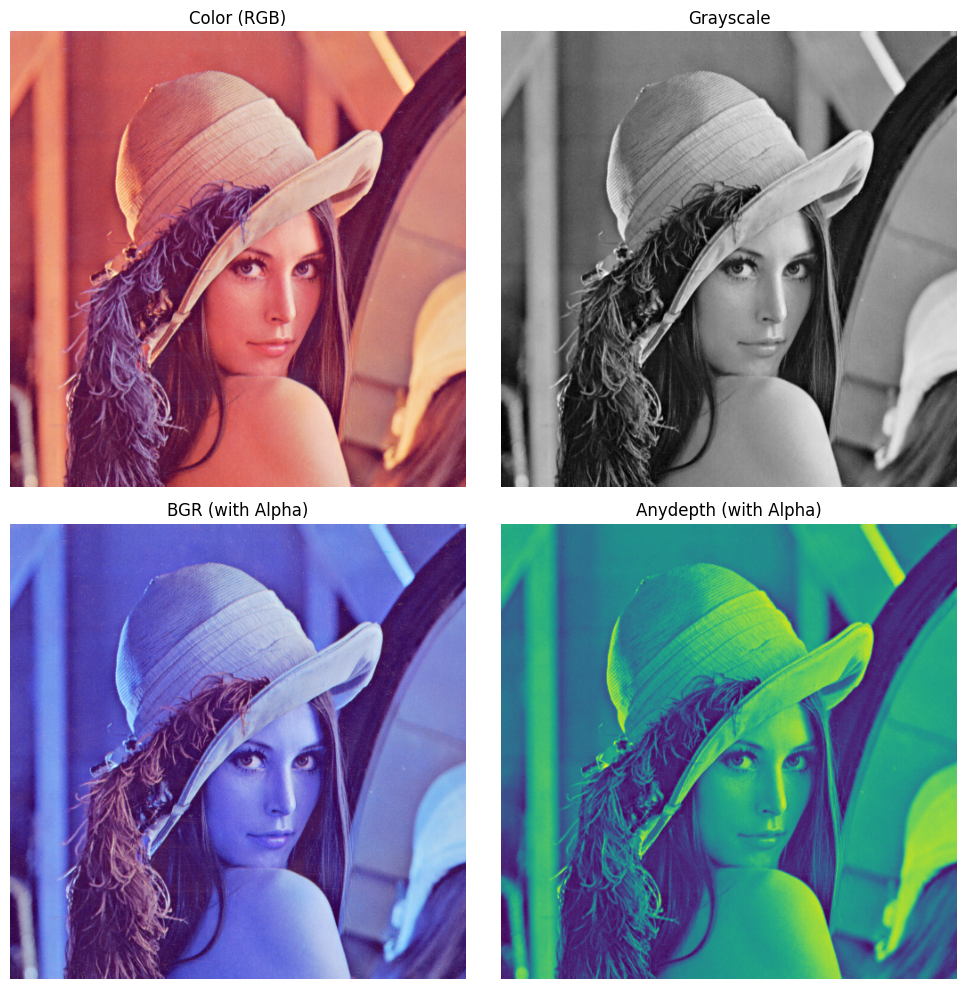

In [78]:
imageRGB = cv.imread("Lena512x512.png", cv.IMREAD_COLOR_RGB)
imageGray = cv.imread("Lena512x512.png", cv.IMREAD_GRAYSCALE)
imageBGR = cv.imread("Lena512x512.png", cv.IMREAD_COLOR_BGR)
image = cv.imread("Lena512x512.png", cv.IMREAD_ANYDEPTH)
# Muestras diferentes imagenes con diferentes canales de color cv.
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# axes is a numpy array containing the individual axes objects.
# Access them using proper indexing:
axes[0, 0].imshow(imageRGB) # Changed from axes[0] to axes[0, 0]
axes[0, 0].set_title("Color (RGB)")
axes[0, 0].axis("off")  # Hide axes

axes[0, 1].imshow(imageGray, cmap="gray") # Changed from axes[1] to axes[0, 1]
axes[0, 1].set_title("Grayscale")
axes[0, 1].axis("off")

axes[1, 0].imshow(imageBGR) # Changed from axes[2] to axes[1, 0]
axes[1, 0].set_title("BGR (with Alpha)")
axes[1, 0].axis("off")

axes[1, 1].imshow(image) # Changed from axes[3] to axes[1, 1]
axes[1, 1].set_title("Anydepth (with Alpha)")
axes[1, 1].axis("off")

# Show the plot
plt.tight_layout()
plt.show()

### 📊 **Generando el Histograma General**

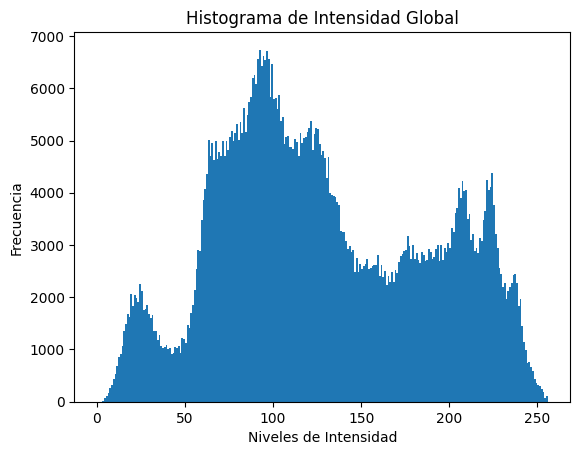

In [ ]:
plt.hist(image.ravel(), bins=256, range=[0,256])
plt.xlabel("Niveles de Intensidad")
plt.ylabel("Frecuencia")
plt.title("Histograma de Intensidad Global")
plt.show()

### 🏆 **Desafío:** Genera los histogramas para cada canal RGB y compáralos

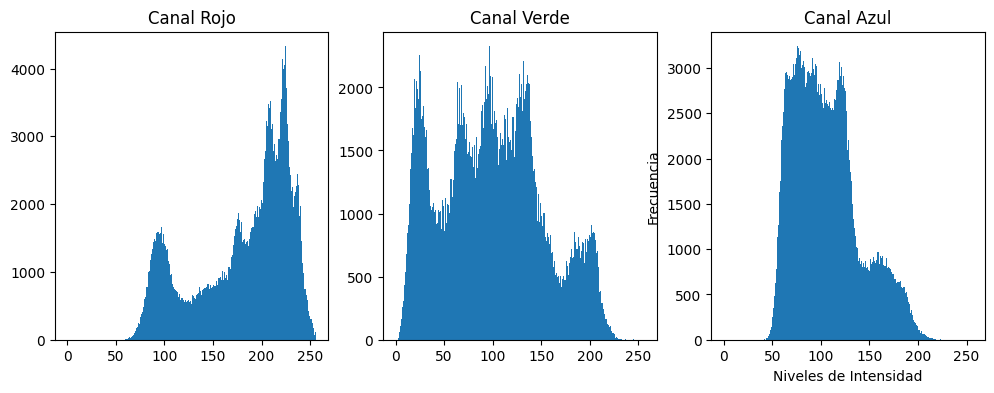

In [ ]:
# Desafío 1: Generar histogramas RGB

imageRGB = cv.imread("Lena512x512.png", cv.IMREAD_COLOR_RGB)
red_channel, green_channel, blue_channel = cv.split(imageRGB)

fig, axis = plt.subplots(1, 3, figsize=(12, 4))

axis[0].hist(red_channel.ravel(), bins=256, range=[0,256])
axis[0].set_title("Canal Rojo")

axis[1].hist(green_channel.ravel(), bins=256, range=[0,256])
axis[1].set_title("Canal Verde")

axis[2].hist(blue_channel.ravel(), bins=256, range=[0,256])
axis[2].set_title("Canal Azul")

plt.xlabel("Niveles de Intensidad")
plt.ylabel("Frecuencia")

plt.show()



## 🔄 **2. Transformaciones Geométricas Afines** <a name="tema2"></a>

📌 En esta sección exploraremos **traslación**, **rotación** y **escalado**.

### ✈️ **Traslación (Translation)**

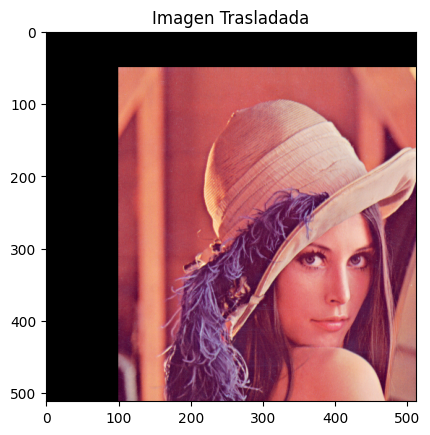

In [ ]:
image = cv.imread("Lena512x512.png", cv.IMREAD_COLOR_RGB)
h, w = image.shape[:2]
transition_matrix = np.float32([[1, 0, 100], [0, 1, 50]])
img_translation = cv.warpAffine(image, transition_matrix, (w, h))

plt.imshow(img_translation)
plt.title("Imagen Trasladada")
plt.show()

### 🔄 **Rotación y Escalado**

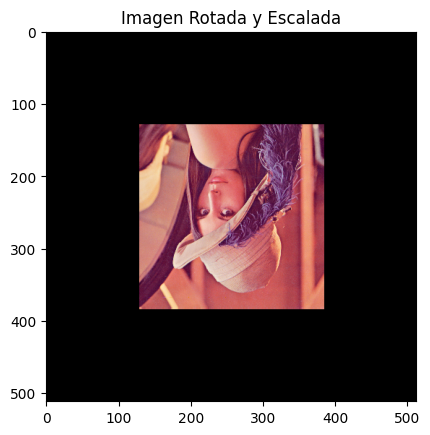

In [ ]:
rotation_matrix = cv.getRotationMatrix2D(center=(w/2, h/2), angle=-180, scale=0.5)
rotated_image = cv.warpAffine(src=image, M=rotation_matrix, dsize=(w, h))

plt.imshow(rotated_image)
plt.title("Imagen Rotada y Escalada")
plt.show()

###

(<matplotlib.image.AxesImage at 0x7e8c7bcfdd10>,
 Text(0.5, 1.0, 'Escalado arbitrario'))

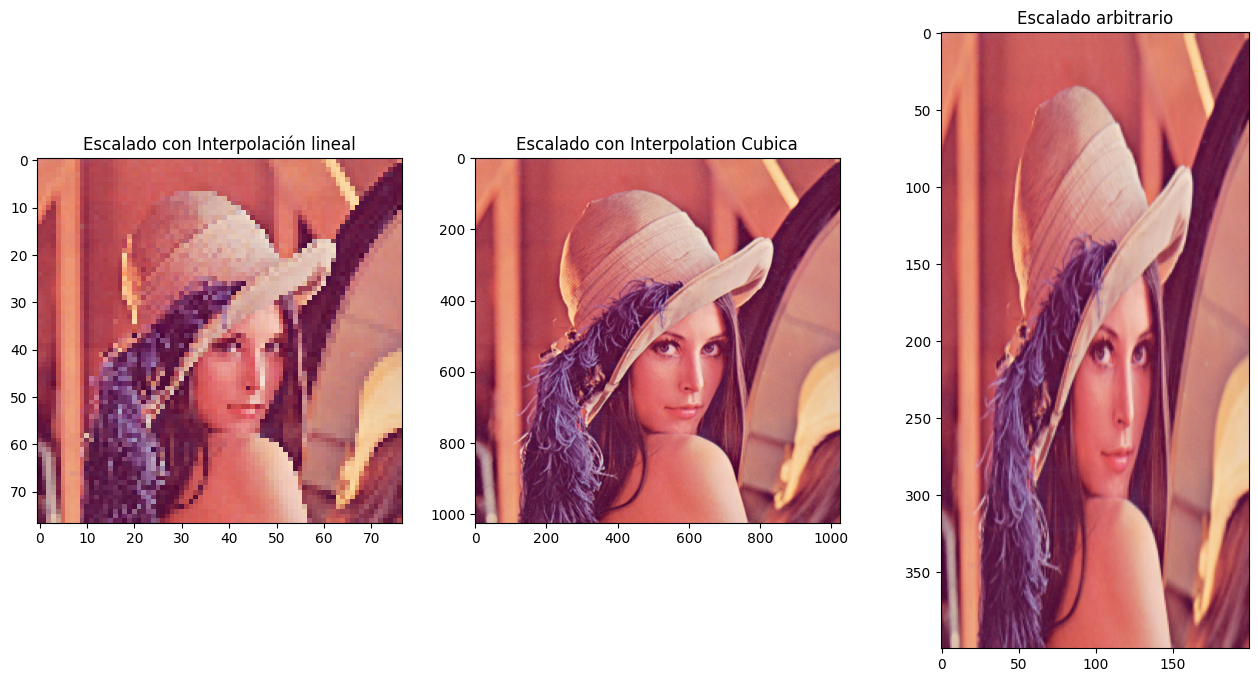

In [ ]:
# Escalando
image_scaled = cv.resize(image, None, fx=0.15, fy=0.15) # 0.15 veces su tamaño original
image_scaled_2 = cv.resize(image, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC) # 2 veces su tamaño original
image_scaled_3 = cv.resize(image, (200, 400), interpolation=cv.INTER_AREA) # definiendo el tamaño arbitrariamente

fig, ax = plt.subplots(1, 3, figsize=(16, 8))
ax[0].imshow(image_scaled), ax[0].set_title("Escalado con Interpolación lineal")
ax[1].imshow(image_scaled_2), ax[1].set_title("Escalado con Interpolation Cubica")
ax[2].imshow(image_scaled_3), ax[2].set_title("Escalado arbitrario")

## 🌈 **3. Transformaciones de Intensidad a Nivel de Píxel** <a name="tema3"></a>

### 🔄 **Negativo de la Imagen**

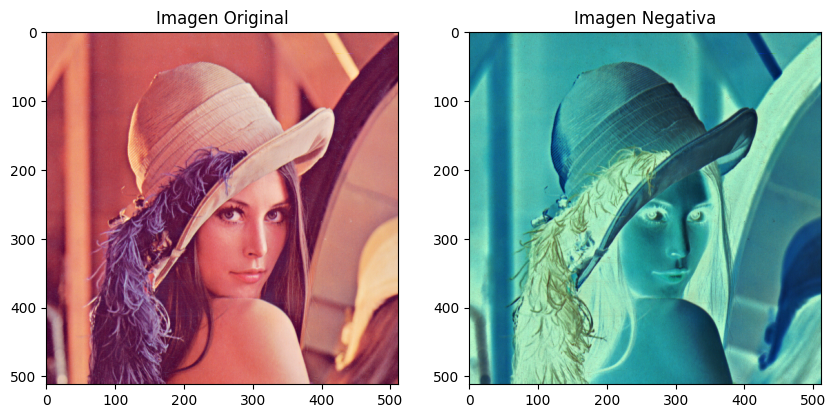

In [ ]:
image_neg = 255 - image

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Imagen Original")
plt.subplot(1, 2, 2)
plt.imshow(image_neg)
plt.title("Imagen Negativa")
plt.show()

### ☀️ **Umbralización (Thresholding)**

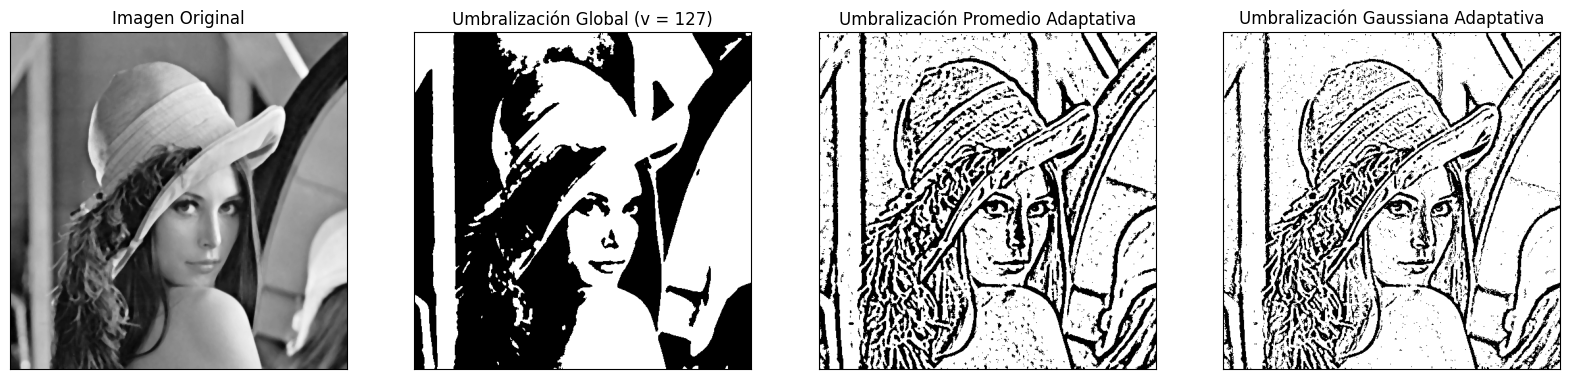

In [ ]:
# Convertir la imagen a escala de grises
gray_img = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

# Aplicar umbralización con OpenCV
img = gray_img
img = cv.medianBlur(img, 5)

ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

titles = ['Imagen Original', 'Umbralización Global (v = 127)', 'Umbralización Promedio Adaptativa', 'Umbralización Gaussiana Adaptativa']
images = [img, th1, th2, th3]

plt.figure(figsize=(20, 10))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])  # Para esconder los "ticks"
plt.show()

## 🎭 **4. Ecualización del Histograma** <a name="tema4"></a>

**Objetivo:** Mejorar el contraste ajustando la distribución de intensidad de la imagen.

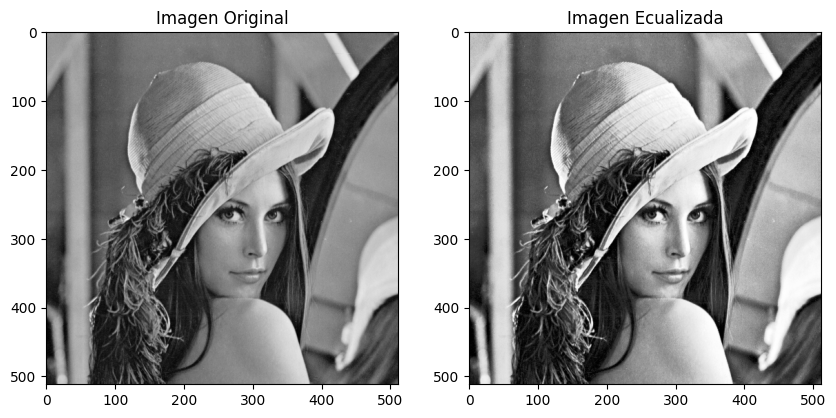

In [ ]:
equ = cv.equalizeHist(gray_img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Imagen Original")
plt.subplot(1, 2, 2)
plt.imshow(equ, cmap='gray')
plt.title("Imagen Ecualizada")
plt.show()

## ⚡ **5. CLAHE - Ecualización de Histograma Adaptativa** <a name="tema5"></a>

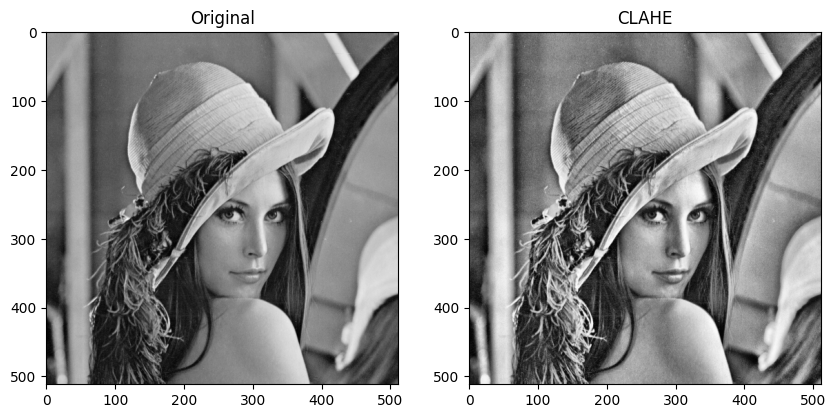

In [ ]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(gray_img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title("CLAHE")
plt.show()

## 🔍 **6. Ampliación del Histograma (Contrast Stretching)** <a name="tema6"></a>

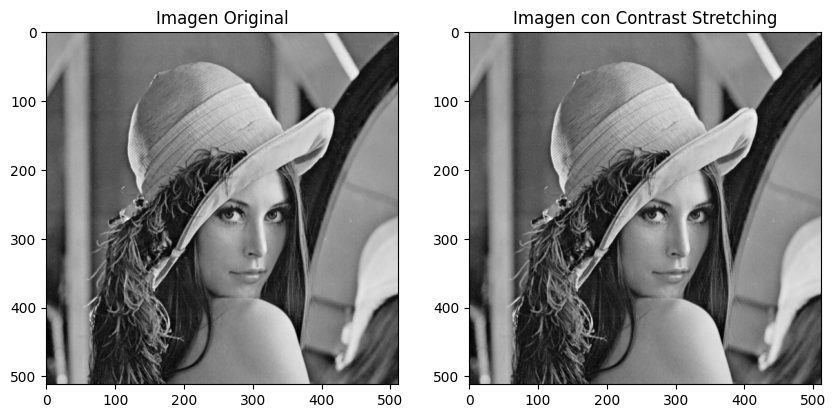

In [ ]:
Imin = np.amin(gray_img)
Imax = np.amax(gray_img)
stretched_img = ((gray_img - Imin) * (255 / (Imax - Imin))).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Imagen Original")
plt.subplot(1, 2, 2)
plt.imshow(stretched_img, cmap='gray')
plt.title("Imagen con Contrast Stretching")
plt.show()

## 🔬 **7. Aplicaciones y Experimentación** <a name="tema7"></a>

### 🏆 **Desafío:** Prueba diferentes transformaciones

📌 **Instrucciones:**
- Aplica **otras transformaciones geométricas** combinando traslación, rotación y escalado.
- Experimenta con **diferentes valores de umbralización** para mejorar la segmentación.
- Prueba distintos **valores de gamma** en la corrección gamma.
- Realiza **combinaciones de ecualización de histograma** con otras técnicas de mejora.

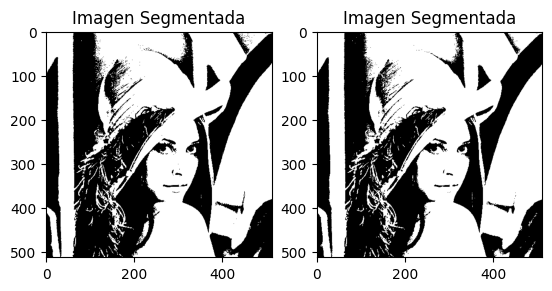

In [ ]:
# 🏆 Escribe aquí tu código para experimentar con diferentes transformaciones

image = cv.imread("Lena512x512.png", cv.IMREAD_COLOR_RGB)

# Segmentacion
# Thresholding Otsu
gray_img = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

_ , th1 = cv.threshold(gray_img, 0, 255, cv.THRESH_OTSU)

_, th2 = cv.threshold(gray_img, 127, 255, cv.THRESH_TRIANGLE)

plt.subplot(1, 2, 1)
plt.imshow(th1, cmap='gray')
plt.title("Imagen Segmentada with OTSU")
plt.subplot(1, 2, 2)
plt.imshow(th2, cmap='gray')
plt.title("Imagen Segmentada with Triangle")
plt.show()




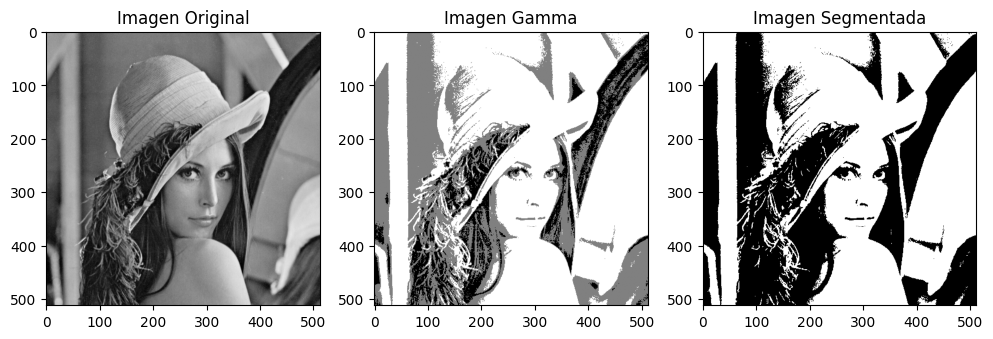

In [ ]:
# Valores Gamma y Segmentacion Mas o Menos entendi, buscar LUT
gamma = 200
invGamma = 1.0 / gamma
table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
imageGamma = cv.LUT( gray_img, table)

_, th3 = cv.threshold(imageGamma, 0, 255, cv.THRESH_OTSU)

fig, axis = plt.subplots(1, 3, figsize=(12, 4))
axis[0].imshow(gray_img, cmap='gray')
axis[0].set_title("Imagen Original")
axis[1].imshow(imageGamma, cmap='gray')
axis[1].set_title("Imagen Gamma")
axis[2].imshow(th3, cmap='gray')
axis[2].set_title("Imagen Segmentada")
plt.show()


Text(0.5, 1.0, 'Imagen Segmentada CLAHE')

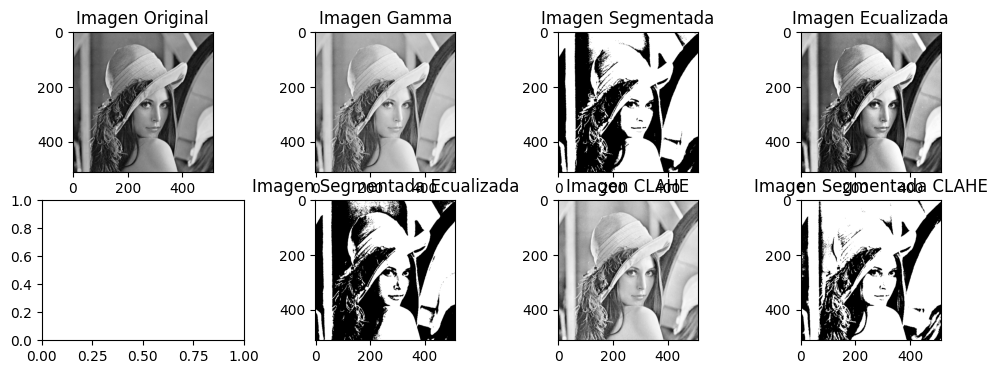

In [ ]:
# Valores Gamma y Ecualizacion
gamma = 5
invGamma = 1.0 / gamma
table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
imageGamma = cv.LUT( gray_img, table)

imageEqualized = cv.equalizeHist(imageGamma)

_, th4 = cv.threshold(imageEqualized, 0, 255, cv.THRESH_OTSU)

imageCLAHE = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = imageCLAHE.apply(imageGamma)

_, th5 = cv.threshold(clahe_img, 0, 255, cv.THRESH_OTSU)


fig, axis = plt.subplots(2,4, figsize=(12, 4))
axis[0,0].imshow(gray_img, cmap='gray')
axis[0,0].set_title("Imagen Original")
axis[0,1].imshow(imageGamma, cmap='gray')
axis[0,1].set_title("Imagen Gamma")
axis[0,2].imshow(th3, cmap='gray')
axis[0,2].set_title("Imagen Segmentada")
axis[0,3].imshow(imageEqualized, cmap='gray')
axis[0,3].set_title("Imagen Ecualizada")
axis[1,1].imshow(th4, cmap='gray')
axis[1,1].set_title("Imagen Segmentada Ecualizada")
axis[1,2].imshow(clahe_img, cmap='gray')
axis[1,2].set_title("Imagen CLAHE")
axis[1,3].imshow(th5, cmap='gray')
axis[1,3].set_title("Imagen Segmentada CLAHE")

## 🎭 **8. CDF y Ecualización con Histogramas** <a name="tema8"></a>
📌 **Objetivo:** Visualizar cómo cambia la distribución de la intensidad antes y después de la ecualización del histograma.

In [2]:
%%capture
image_url = "https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/refs/heads/2024/Sesiones/Sesion2/Imagenes/Einstein_1_lowcontrast.tif"
file_path = "Einstein_1_lowcontrast.tif"
!wget -O {file_path} {image_url}

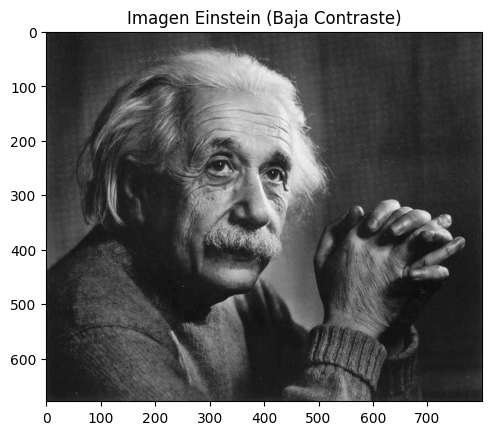

In [3]:
# 📥 **Carga de Imagen Einstein**
image_path = "Einstein_1_lowcontrast.tif"
image_einstein = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Mostrar la imagen cargada
plt.imshow(image_einstein, cmap='gray')
plt.title("Imagen Einstein (Baja Contraste)")
plt.show()

[108 107 106 105 105 105 104 104 105 105]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.68188513e-06 9.20471281e-06 4.41826215e-05
 9.57290133e-05 6.59057437e-04 3.58247423e-03 1.71281296e-02
 4.47275405e-02 1.10020250e-01 1.71056701e-01 2.10393962e-01]
[80. 81. 82. 83. 84. 85. 86. 87. 88. 89. 90. 91. 92. 93. 94. 95. 96. 97.
 98. 99.]


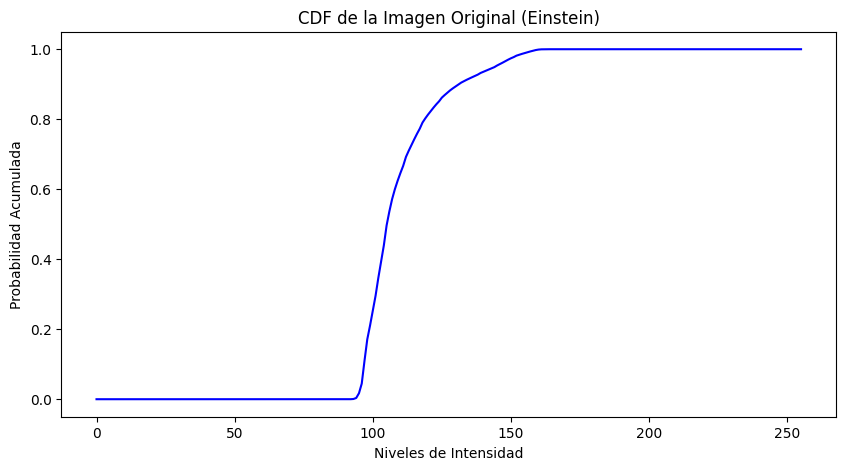

In [12]:
# Calcular el histograma y la función de distribución acumulativa (CDF)
hist, bins = np.histogram(image_einstein.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_norm_orig = cdf / cdf.max()

print(image_einstein.flatten()[0:10])
print(cdf_norm_orig[80:100])
print(bins[80:100])

plt.figure(figsize=(10,5))
plt.plot(cdf_norm_orig, color='b')
plt.xlabel('Niveles de Intensidad')
plt.ylabel('Probabilidad Acumulada')
plt.title('CDF de la Imagen Original (Einstein)')
plt.show()

**8.1 Construccion de CDF Y Ecualizacion de Histograma***

[ 88.38716863 100.39169735 112.1197257  126.65688513 126.65688513
 126.65688513 126.65688513 126.65688513 112.1197257  112.1197257
 112.1197257  112.1197257  112.1197257  112.1197257  112.1197257
 112.1197257  145.86497607 145.86497607 145.86497607 145.86497607]


<ipython-input-36-e04b01001ebd>:32: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[1,0].hist(image_einstein.ravel(), 256, [0,256])
<ipython-input-36-e04b01001ebd>:39: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[1,1].hist(equalized_image.ravel(), 256, [0,256])
<ipython-input-36-e04b01001ebd>:45: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[1,2].hist(equalized_manual.flatten(), 256, [0,256])


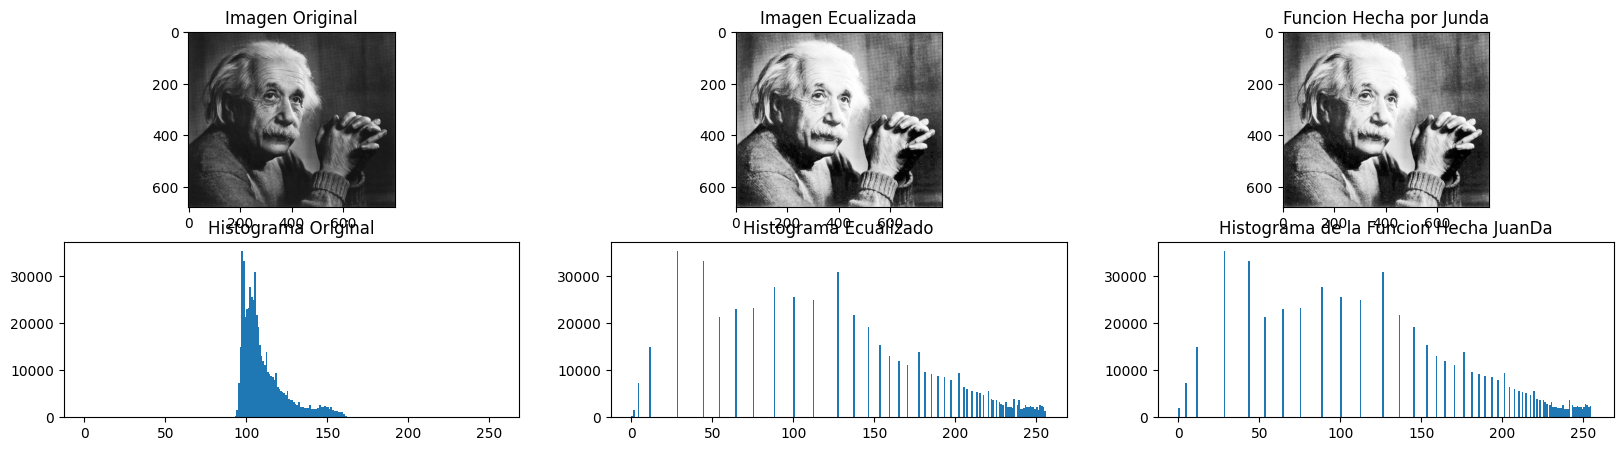

In [36]:
"""
Calcular el histograma de la imagen en escala de grises H  Norma0lizar el histograma para que la imagen este entre [0,255]
Calcular el CDF del histograma -> H'
Transform the image using H' as a look-up table

"""

def manualequalization(image):
    # Calcular el histograma y la función de distribución acumulativa (CDF)
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_norm = cdf / cdf.max()

    equalized_image = np.interp(image.flatten(), bins[:-1], cdf_norm)  #Interpolacion aproximar los valores de image.flatten() -> valores entre [0,255]
    equalized_image = equalized_image*255
    print(equalized_image[80:100])                                                                    # convierte este imagen 2D en un vector 1D con cada uno de los pixeles se va a aproximar teniendo en cuenta
    return equalized_image.reshape(image.shape).astype(np.uint8)                       #los bins(x) igual de [0,255] con su CDF normalizada (y)

image_path = "Einstein_1_lowcontrast.tif"
image_einstein = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

equalized_image = cv.equalizeHist(image_einstein)

equalized_manual = manualequalization(image_einstein)

# Compare OpenCV vs Manual
fig, axes = plt.subplots(2, 3, figsize=(20, 5))
axes[0, 0].imshow(image_einstein, cmap='gray')
axes[0, 0].set_title("Imagen Original")


axes[1,0].hist(image_einstein.ravel(), 256, [0,256])

axes[1,0].set_title("Histograma Original")

axes[0, 1].imshow(equalized_image, cmap='gray')
axes[0, 1].set_title("Imagen Ecualizada")

axes[1,1].hist(equalized_image.ravel(), 256, [0,256])
axes[1,1].set_title("Histograma Ecualizado")

axes[0, 2].imshow(equalized_manual, cmap='gray')
axes[0, 2].set_title("Funcion Hecha por Junda")

axes[1,2].hist(equalized_manual.flatten(), 256, [0,256])
axes[1,2].set_title("Histograma de la Funcion Hecha JuanDa")

plt.show()

plt.show()



**Una Forma mas facil documentacion de cv**

<ipython-input-62-4ff036b0a618>:18: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[1].hist(hist_equ.ravel(), 256, [0,256])


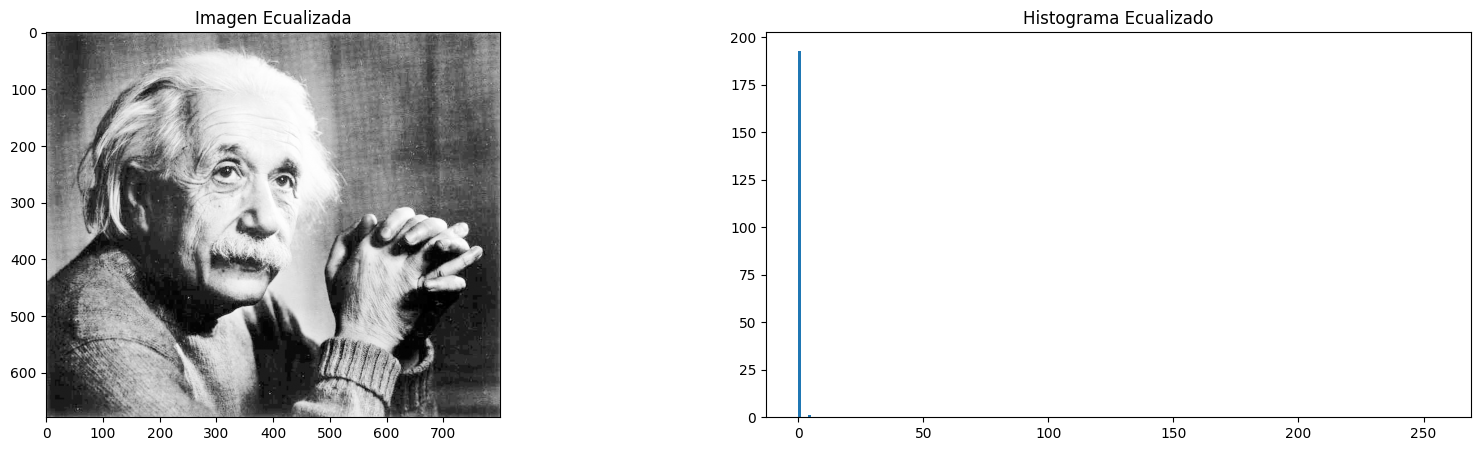

In [62]:
hist, bins = np.histogram(image_einstein.flatten(), 256, [0,256])
cdf = hist.cumsum()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[image_einstein]

hist_equ, bins_equ = np.histogram(img2.flatten(), 256, [0,256])
cdf_equ = hist_equ.cumsum()

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

axes[0].imshow(img2, cmap='gray')
axes[0].set_title("Imagen Ecualizada")

axes[1].hist(hist_equ.ravel(), 256, [0,256])
axes[1].set_title("Histograma Ecualizado")

plt.show()


### 📌 **Ecualización de Histograma con Visualización**

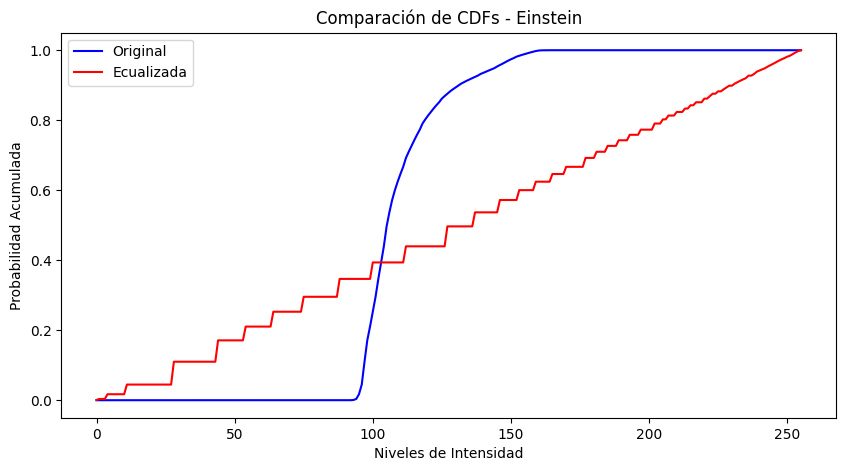

In [38]:
# Aplicar ecualización de histograma
equ = cv.equalizeHist(image_einstein)
hist_equ, bins_equ = np.histogram(equ.flatten(), 256, [0,256])
cdf_equ = hist_equ.cumsum()
cdf_norm_equ = cdf_equ / cdf_equ.max()

plt.figure(figsize=(10,5))
plt.plot(cdf_norm_orig, color='b', label='Original')
plt.plot(cdf_norm_equ, color='r', label='Ecualizada')
plt.xlabel('Niveles de Intensidad')
plt.ylabel('Probabilidad Acumulada')
plt.title('Comparación de CDFs - Einstein')
plt.legend()
plt.show()

### 📌 **Comparación Visual Antes y Después de la Ecualización**

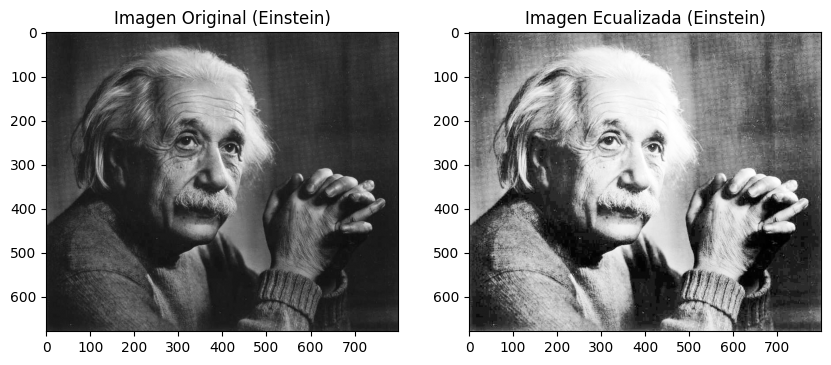

In [39]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image_einstein, cmap='gray')
plt.title("Imagen Original (Einstein)")
plt.subplot(1, 2, 2)
plt.imshow(equ, cmap='gray')
plt.title("Imagen Ecualizada (Einstein)")
plt.show()

<ipython-input-40-211ea2d00e07>:4: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image_einstein.ravel(), 256, [0,256], color='b')
<ipython-input-40-211ea2d00e07>:9: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equ.ravel(), 256, [0,256], color='r')


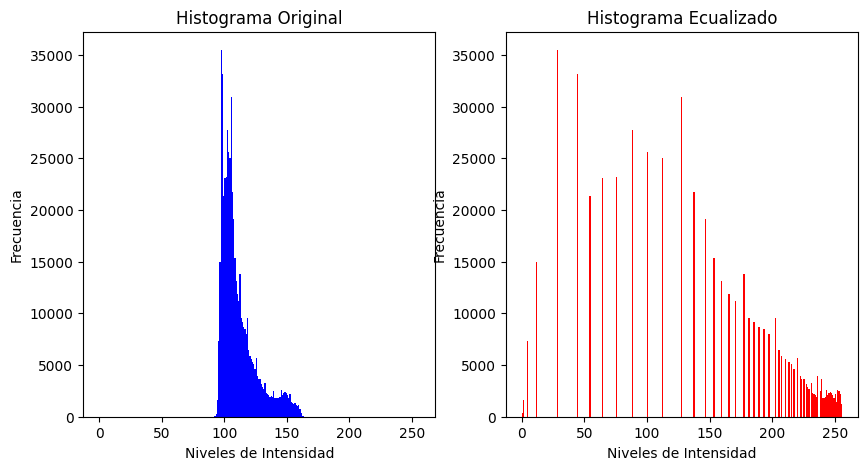

In [40]:
# Plotear los histogramas
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(image_einstein.ravel(), 256, [0,256], color='b')
plt.title("Histograma Original")
plt.xlabel("Niveles de Intensidad")
plt.ylabel("Frecuencia")
plt.subplot(1, 2, 2)
plt.hist(equ.ravel(), 256, [0,256], color='r')
plt.title("Histograma Ecualizado")
plt.xlabel("Niveles de Intensidad")
plt.ylabel("Frecuencia")
plt.show()

### ⚡ **9. CLAHE (Contrast Limited Adaptive Histogram Equalization)** <a name="tema5"></a>

📌 **Objetivo:** Aplicar ecualización adaptativa para mejorar el contraste sin amplificar demasiado el ruido.

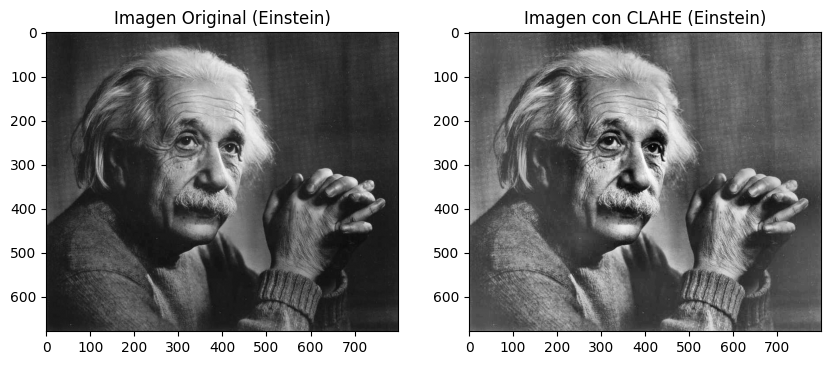

In [41]:
clahe = cv.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
clahe_img = clahe.apply(image_einstein)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image_einstein, cmap='gray')
plt.title("Imagen Original (Einstein)")
plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title("Imagen con CLAHE (Einstein)")
plt.show()

### 🔍 **10. Ampliación del Histograma (Contrast Stretching)** <a name="tema6"></a>
📌 **Objetivo:** Expandir el rango dinámico de la imagen para mejorar el contraste.

89
166
[108 107 106 ... 105 105 106]
[62 59 56 ... 52 52 56]


<ipython-input-57-3e02c12f9431>:12: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axis[1, 0].hist(image_einstein.ravel(), 256, [0,256])
<ipython-input-57-3e02c12f9431>:17: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axis[1, 1].hist(stretched_img.ravel(), 256, [0,256])


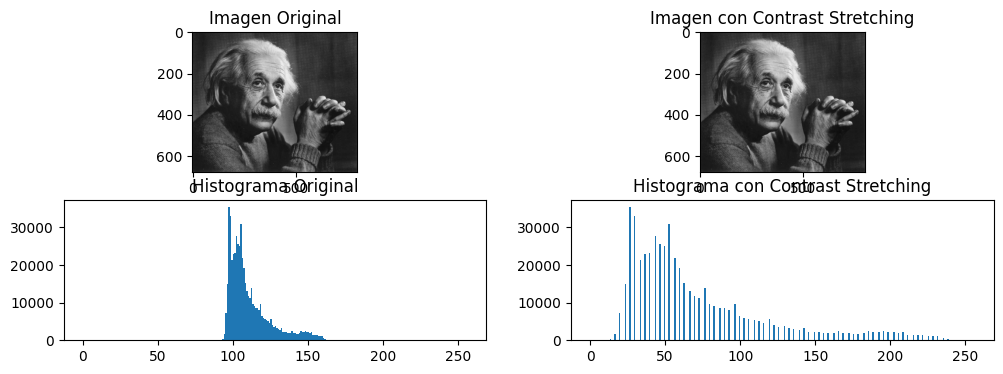

In [57]:
Imin = np.amin(image_einstein)
print(Imin)
Imax = np.amax(image_einstein)
print(Imax)
stretched_img = ((image_einstein - Imin) * (255 / (Imax - Imin))).astype(np.uint8)   #Desplaza cada pixel a la izquierda un Imin el menor sera cero.
print(image_einstein.flatten())                                                      #Normaliza la imagen dividiendo entre el Imax - Imin [0,1]
print(stretched_img.flatten())                                                       #Se multiplica por 255, valores de intensidad entre [0,255]

fig, axis = plt.subplots(2, 2, figsize=(12, 4))
axis[0, 0].imshow(image_einstein, cmap='gray')
axis[0, 0].set_title("Imagen Original")
axis[1, 0].hist(image_einstein.ravel(), 256, [0,256])
axis[1, 0].set_title("Histograma Original")

axis[0, 1].imshow(stretched_img, cmap='gray')
axis[0, 1].set_title("Imagen con Contrast Stretching")
axis[1, 1].hist(stretched_img.ravel(), 256, [0,256])
axis[1, 1].set_title("Histograma con Contrast Stretching")
plt.show()

<ipython-input-58-f0ccc3cd6c83>:13: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image_einstein.ravel(), 256, [0,256], color='b')
<ipython-input-58-f0ccc3cd6c83>:18: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equ.ravel(), 256, [0,256], color='r')
<ipython-input-58-f0ccc3cd6c83>:23: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(clahe_img.ravel(), 256, [0,256], color='g')


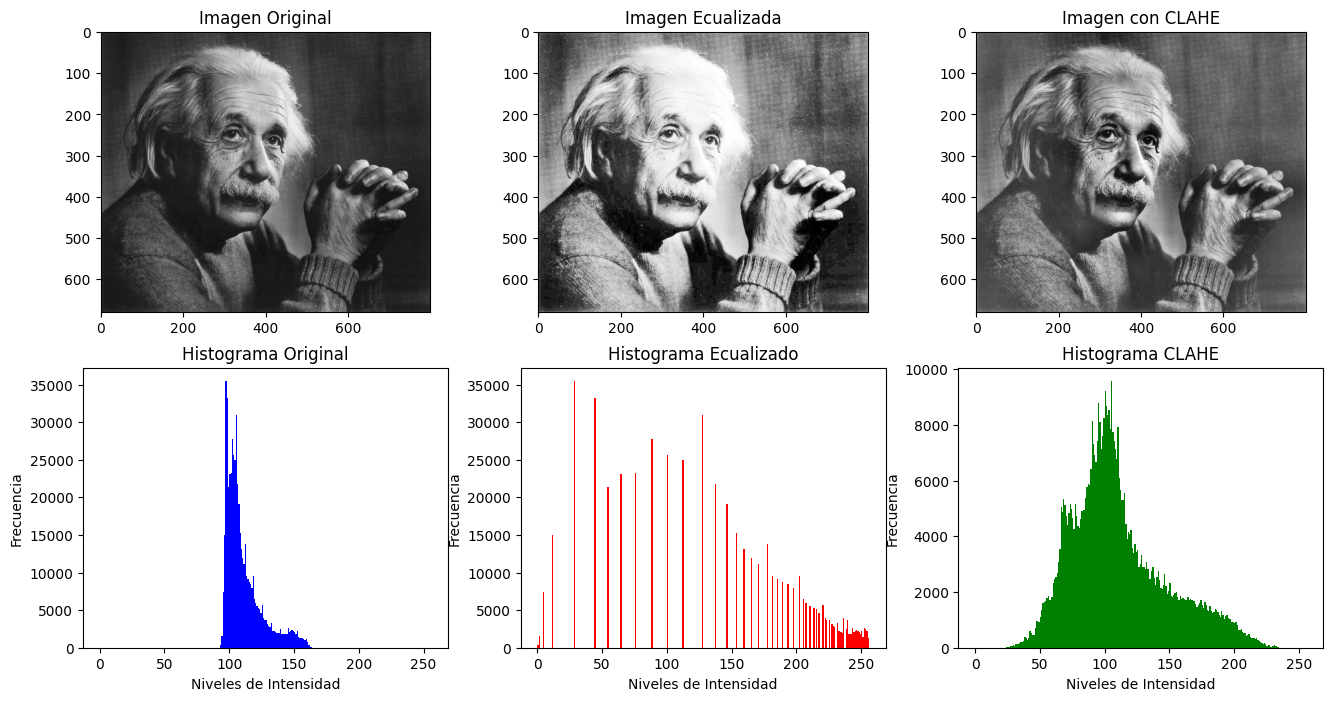

In [58]:
# @title resultados
plt.figure(figsize=(16, 8))
plt.subplot(2, 3, 1)
plt.imshow(image_einstein, cmap='gray')
plt.title("Imagen Original")
plt.subplot(2, 3, 2)
plt.imshow(equ, cmap='gray')
plt.title("Imagen Ecualizada")
plt.subplot(2, 3, 3)
plt.imshow(clahe_img, cmap='gray')
plt.title("Imagen con CLAHE")
plt.subplot(2, 3, 4)
plt.hist(image_einstein.ravel(), 256, [0,256], color='b')
plt.title("Histograma Original")
plt.xlabel("Niveles de Intensidad")
plt.ylabel("Frecuencia")
plt.subplot(2, 3, 5)
plt.hist(equ.ravel(), 256, [0,256], color='r')
plt.title("Histograma Ecualizado")
plt.xlabel("Niveles de Intensidad")
plt.ylabel("Frecuencia")
plt.subplot(2, 3, 6)
plt.hist(clahe_img.ravel(), 256, [0,256], color='g')
plt.title("Histograma CLAHE")
plt.xlabel("Niveles de Intensidad")
plt.ylabel("Frecuencia")
plt.show()

### 🔬 **11. Preguntas y Reflexión** <a name="tema7"></a>

**Preguntas:**
- ¿Cuál es la diferencia entre "estiramiento de contraste" y "ecualización de histograma"?
- ¿Cuándo preferirías usar CLAHE sobre la ecualización estándar?
- ¿Qué ventajas y desventajas tiene el contraste adaptativo?

La principal **diferencia** en **estiramiento de constraste** se trata de utilizar los [0,255] valores de intensidad no cambia la forma de el histograma.

En **ecualizacion de histograma** es lo mismo pero cambia la forma del histograma por ello los valores de intensidad de los pixeles cambia.


**CLAHE** no funciona muy bien para imagenes con ruido pero es mejor que la ecualizacion estandar, ademas para limitar el constraste de manera que se vean mejor ciertos detalles

Ejemplo CLAHE


In [64]:
from skimage.exposure import rescale_intensity


In [65]:
%%capture
url = "https://raw.githubusercontent.com/Gilberter/Hands-on-Computer-Vision/main/sesiones/sesion2/numberhappyhearth.jpg"
name = "numberhappyhearth.jpg"
!wget -O $name $url

In [66]:
def convolve(image, kernel):
    """
    Aplica una convolución 2D a una imagen usando un kernel dado.
    """
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]  # La mayoria de kernels son 3X3
    pad = (kW - 1) // 2  # Espacios
    image = cv.copyMakeBorder(image, pad, pad, pad, pad, cv.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")

    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            output[y - pad, x - pad] = (roi * kernel).sum()
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
    return output

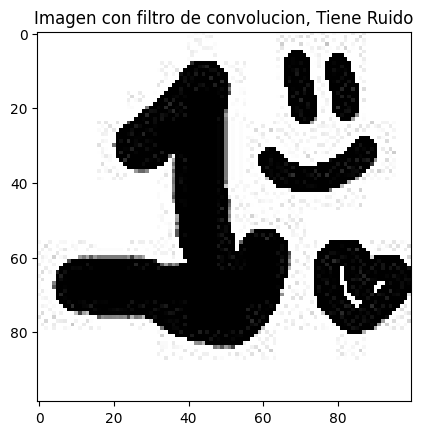

In [68]:
image = cv.imread("numberhappyhearth.jpg", cv.IMREAD_GRAYSCALE)
sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
imageconvolve = convolve(image, sharpen)

plt.imshow(imageconvolve, cmap='gray')
plt.title("Imagen con filtro de convolucion, Tiene Ruido")
plt.show()

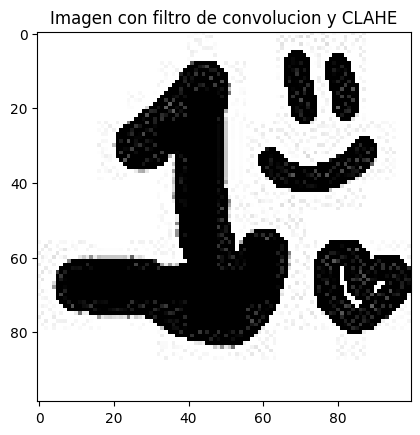

In [73]:
imageclahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = imageclahe.apply(imageconvolve)
plt.imshow(cl1, cmap='gray')
plt.title("Imagen con filtro de convolucion y CLAHE")
plt.show()


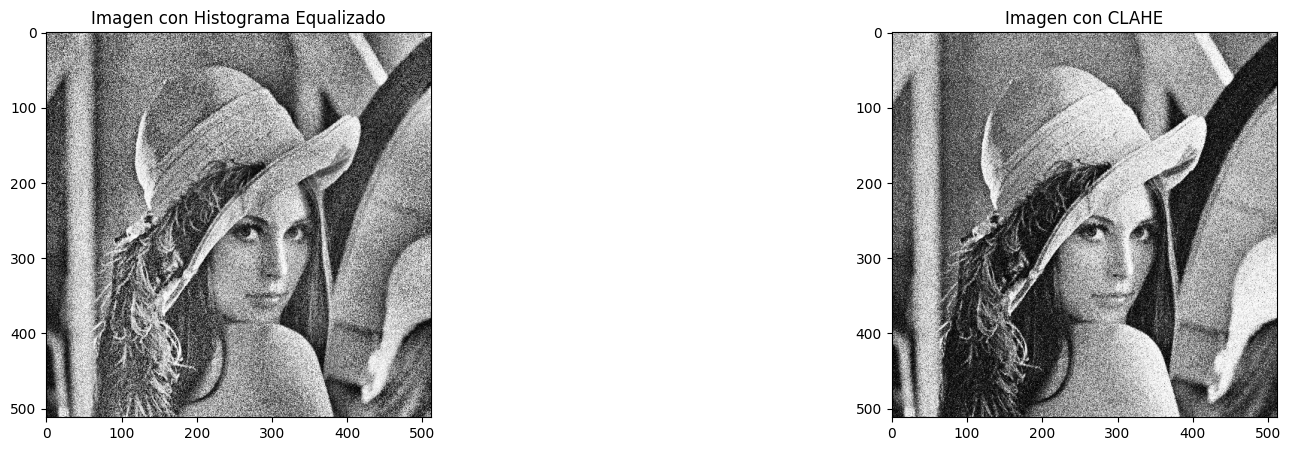

In [104]:
image = cv.imread("Lena512x512.png", cv.IMREAD_GRAYSCALE)
imageclahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

NOISE_STD = 25
noise = np.random.normal(scale=NOISE_STD, size=image.shape)
noisy_image = image + noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

claheimge = imageclahe.apply(noisy_image)
equalized_image = cv.equalizeHist(noisy_image)

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].imshow(claheimge, cmap='gray')
axes[0].set_title("Imagen con Histograma Equalizado")
axes[1].imshow(equalized_image, cmap='gray')
axes[1].set_title("Imagen con CLAHE")
plt.show()